# Chapter 2: Understanding Time Series Analysis

## Chapter 2: Advanced processing and visualization of time series data

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current directory and work relative to it
os.chdir('D:/Practical Time Series')

In [3]:
"""
Let us shown an example of resampling to a given frequency
"""

'\nLet us shown an example of resampling to a given frequency\n'

In [26]:
#Read dataset into pandas DataFrame
df = pd.read_csv('datasets/chemical-concentration-readings.csv')

In [27]:
#Let's see the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (197, 2)


In [28]:
#Let's see first 10 rows of the DataFrame
df.head(10)

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [29]:
#The observations seem to be taken at an interval of 2 hours

In [30]:
#Parse the timestamp to datetime row index of the DataFrame
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [38]:
#Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

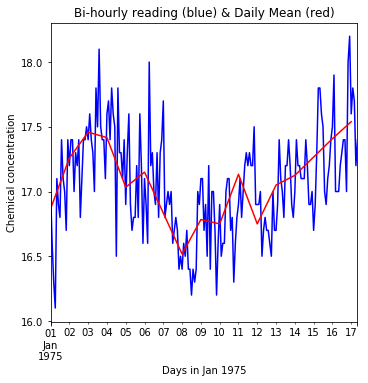

In [39]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

plt.savefig('plots/ch2/B07887_02_02.png', format='png', dpi=300)

In [11]:
"""
Let us shown an example of grouping by a period
"""

'\nLet us shown an example of grouping by a period\n'

In [12]:
#Load the DataFrame and re-index the row to datetime64
df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [13]:
#Display shape of the DataFrame
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1461, 2)


In [14]:
#Let's see first 10 rows
df.head(10)

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.00
1988-01-02,1988-01-02,-20.50
1988-01-03,1988-01-03,-22.00
1988-01-04,1988-01-04,-30.50
1988-01-05,1988-01-05,-31.00
1988-01-06,1988-01-06,-27.50
1988-01-07,1988-01-07,-26.25
1988-01-08,1988-01-08,-26.50
1988-01-09,1988-01-09,-23.00


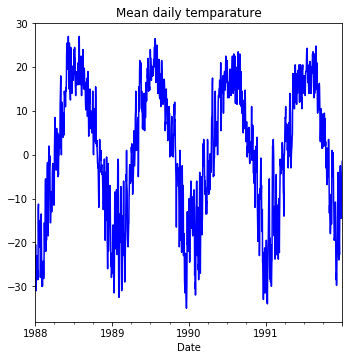

In [15]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

plt.savefig('plots/ch2/B07887_02_03.png', format='png', dpi=300)

In [16]:
#We need to groupby the data for every month and find aggregate statistics

#Let's start by adding a Month_Year column
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

df.head(10)

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.00,01-1988
1988-01-02,1988-01-02,-20.50,01-1988
1988-01-03,1988-01-03,-22.00,01-1988
1988-01-04,1988-01-04,-30.50,01-1988
1988-01-05,1988-01-05,-31.00,01-1988
1988-01-06,1988-01-06,-27.50,01-1988
1988-01-07,1988-01-07,-26.25,01-1988
1988-01-08,1988-01-08,-26.50,01-1988
1988-01-09,1988-01-09,-23.00,01-1988


In [17]:
#Calculate month wise statistics
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [18]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


In [19]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']

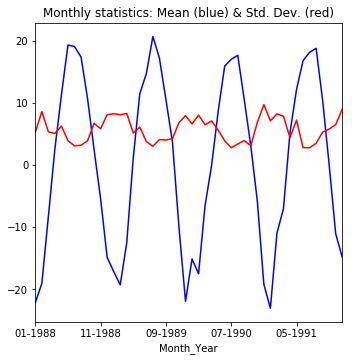

In [20]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

plt.savefig('plots/ch2/B07887_02_04.png', format='png', dpi=300)

In [21]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [22]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [23]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

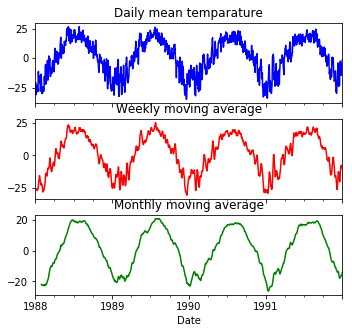

In [24]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

plt.savefig('plots/ch2/B07887_02_05.png', format='png', dpi=300)

## Chapter 2: Resampling time series data

In [14]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
#we always start by setting the current directory and then working relative to it
os.chdir('D:/Practical Time Series')

In [3]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [4]:
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


In [5]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [6]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


In [7]:
#We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

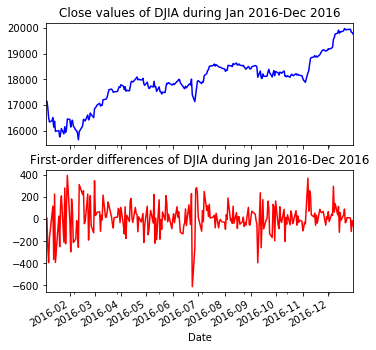

In [8]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')
#plt.savefig('plots/ch2/B07887_02_06.png', format='png', dpi=300)

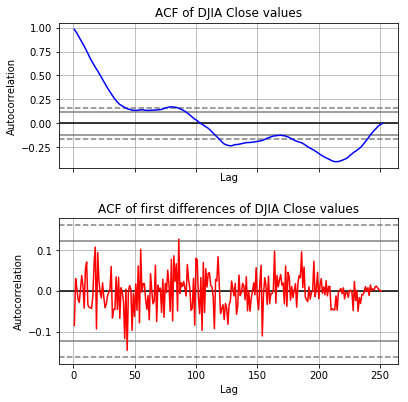

In [18]:
#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('plots/ch2/B07887_02_07.png', format='png', dpi=300)

In [10]:
"""
Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags
"""

'\nNow we will perform the Ljung-Box test on the ACFs\nof the original time series and the first-differences.\nFor running the test we will limit upto 20 lags\n'

In [11]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the original DJIA Close values
"""
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 unbiased=True,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [12]:
"""Let us check if at confidence level 95% (alpha=0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 1.06937677537e-55
Null hypothesis is rejected at lag = 1 for p-val = 9.99432646963e-107
Null hypothesis is rejected at lag = 2 for p-val = 3.51431863547e-156
Null hypothesis is rejected at lag = 3 for p-val = 8.30678314236e-204
Null hypothesis is rejected at lag = 4 for p-val = 1.33852326465e-249
Null hypothesis is rejected at lag = 5 for p-val = 1.19209433653e-293
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is reject

In [13]:
"""
The above results show statistically significant ACF in the original DJIA Close values
"""

'\nThe above results show statistically significant ACF in the original DJIA Close values\n'

In [14]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the differenced DJIA Close values
"""
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     unbiased=True,
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [15]:
"""Let us check if at confidence level of 95% (alpha = 0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.17569800898
Null hypothesis is accepted at lag = 1 for p-val = 0.353830085301
Null hypothesis is accepted at lag = 2 for p-val = 0.553139564033
Null hypothesis is accepted at lag = 3 for p-val = 0.698512780756
Null hypothesis is accepted at lag = 4 for p-val = 0.789158012067
Null hypothesis is accepted at lag = 5 for p-val = 0.877290328278
Null hypothesis is accepted at lag = 6 for p-val = 0.901277483583
Null hypothesis is accepted at lag = 7 for p-val = 0.942982316238
Null hypothesis is accepted at lag = 8 for p-val = 0.948591655652
Null hypothesis is accepted at lag = 9 for p-val = 0.93779779437
Null hypothesis is accepted at lag = 10 for p-val = 0.893761260743
Null hypothesis is accepted at lag = 11 for p-val = 0.915219093022
Null hypothesis is accepted at lag = 12 for p-val = 0.926324524389
Null hypothesis is accepted at lag = 13 for p-val = 0.9350725554
Null hypothesis is accepted at lag = 14 for p-val = 0.940439468541
Null hypo

In [16]:
"""
The above results show that ACF is essentially random in the differenced DJIA Close values
"""

'\nThe above results show that ACF is essentially random in the differenced DJIA Close values\n'

In [3]:
from __future__ import print_function
import os
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('D:/Practical Time Series')

In [5]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [6]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [7]:
#Let's see first 10 rows of it
air_miles.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0
1963-06,1963-06,9644.0
1963-07,1963-07,10466.0
1963-08,1963-08,10748.0
1963-09,1963-09,9963.0


In [8]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [9]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


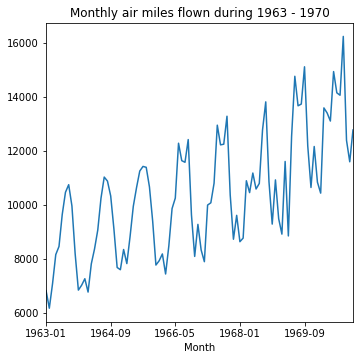

In [10]:
#Plot the time series of air miles flown
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')
plt.savefig('plots/ch2/B07887_02_13.png', format='png', dpi=300)

In [19]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

In [20]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.994502281123


## Chapter 2: Ploting Autocorrelation

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set the current working directory
os.chdir('D:/Practical Time Series/')

In [3]:
#Read data from Excel file
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [4]:
#Display first 20 rows of the DataFrame
daily_temp.head(10)

,Date,Mean_Temperature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


In [5]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [6]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(10)

,Mean_Temperature
Date,
1988-01-01,-23.00
1988-01-02,-20.50
1988-01-03,-22.00
1988-01-04,-30.50
1988-01-05,-31.00
1988-01-06,-27.50
1988-01-07,-26.25
1988-01-08,-26.50
1988-01-09,-23.00


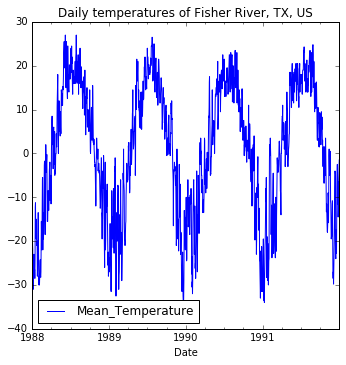

In [7]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_08.png', format='png', dpi=300)

In [8]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

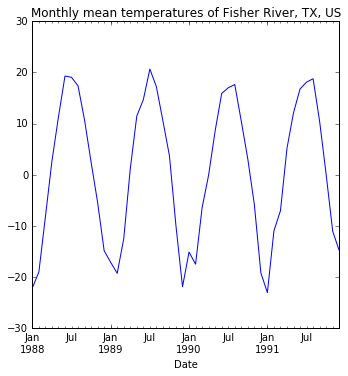

In [9]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_09.png', format='png', dpi=300)

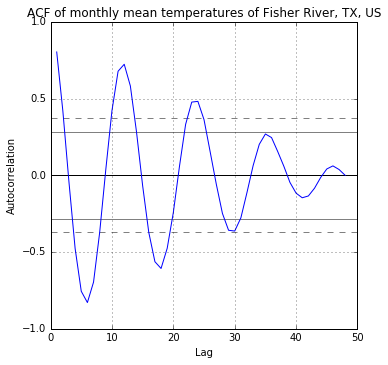

In [10]:
#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)
plt.savefig('plots/ch2/B07887_02_10.png', format='png', dpi=300)

In [11]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

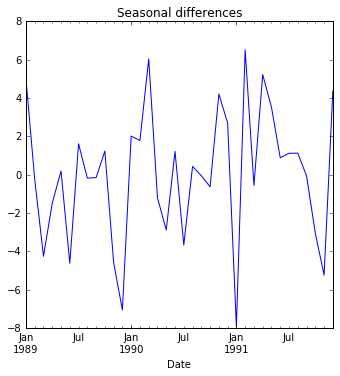

In [12]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_11.png', format='png', dpi=300)

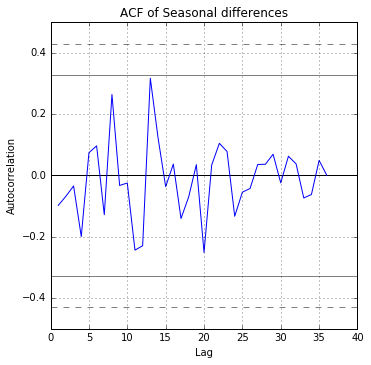

In [13]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)
plt.savefig('plots/ch2/B07887_02_12.png', format='png', dpi=300)

In [14]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [15]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int32),)


## Chapter 2: Seasonal Differencing

In [31]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
#Set the current working directory
os.chdir('D:/Practical Time Series/')

In [33]:
#Read data from Excel file
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [34]:
#Display first 20 rows of the DataFrame
daily_temp.head(10)

,Date,Mean_Temperature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


In [35]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [36]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(10)

,Mean_Temperature
Date,
1988-01-01,-23.00
1988-01-02,-20.50
1988-01-03,-22.00
1988-01-04,-30.50
1988-01-05,-31.00
1988-01-06,-27.50
1988-01-07,-26.25
1988-01-08,-26.50
1988-01-09,-23.00


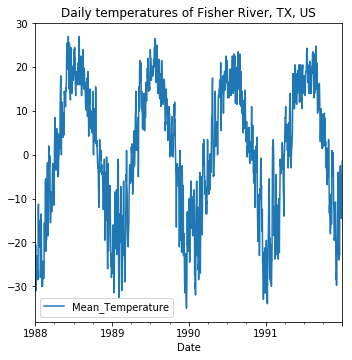

In [37]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_08.png', format='png', dpi=300)

In [38]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

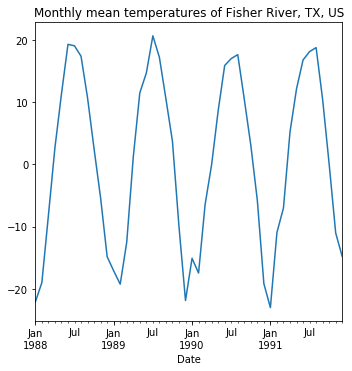

In [39]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_09.png', format='png', dpi=300)

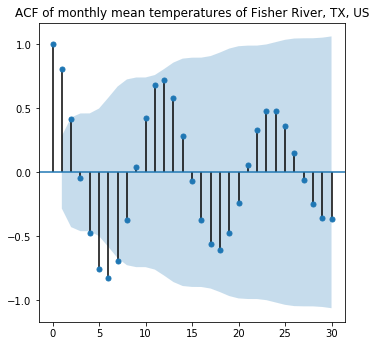

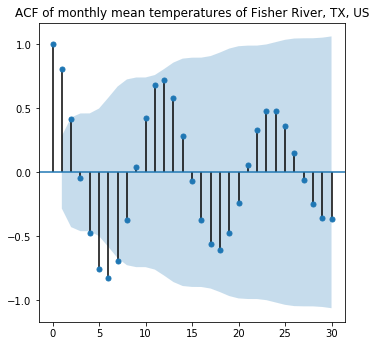

In [40]:
#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
#autocorrelation_plot(monthly_mean_temp, ax=ax)
plot_acf(monthly_mean_temp,lags=30,
         title='ACF of monthly mean temperatures of Fisher River, TX, US',
         ax=ax
        )
#plt.savefig('plots/ch2/B07887_02_10.png', format='png', dpi=300)

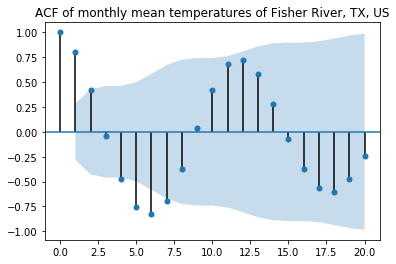

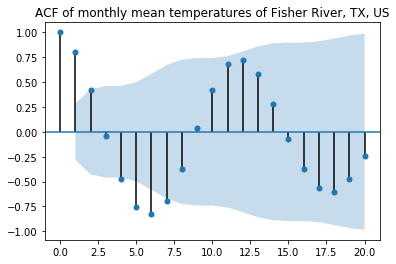

In [25]:
plot_acf(monthly_mean_temp,lags=20, title='ACF of monthly mean temperatures of Fisher River, TX, US')

(array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20]),
 array([-0.24461246, -0.47536716, -0.60369003, -0.55747598, -0.36492553,
        -0.06054339,  0.28827097,  0.58481628,  0.72311458,  0.67511451,
         0.41732813,  0.03541151, -0.37288728, -0.69382203, -0.82407157,
        -0.74793269, -0.46766027, -0.03692674,  0.42650131,  0.80754769,
         1.        ,  0.80754769,  0.42650131, -0.03692674, -0.46766027,
        -0.74793269, -0.82407157, -0.69382203, -0.37288728,  0.03541151,
         0.41732813,  0.67511451,  0.72311458,  0.58481628,  0.28827097,
        -0.06054339, -0.36492553, -0.55747598, -0.60369003, -0.47536716,
        -0.24461246]),
 <matplotlib.lines.Line2D at 0x13721305048>)

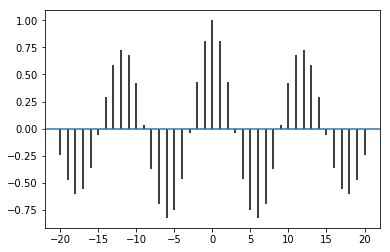

In [41]:
plt.acorr(monthly_mean_temp, maxlags=20)

In [15]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

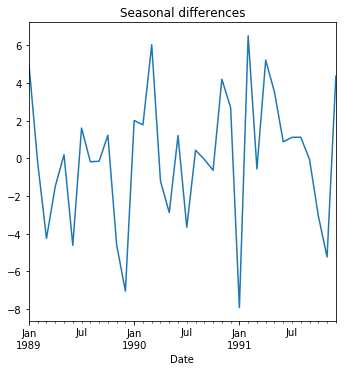

In [16]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_11.png', format='png', dpi=300)

C:\Users\avpal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


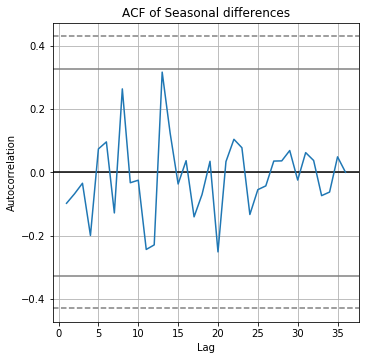

In [17]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax, )
plt.savefig('plots/ch2/B07887_02_12.png', format='png', dpi=300)

In [18]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


In [19]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


In [29]:
acf , confint, qstat , pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)

In [30]:
confint

array([[ 1.        ,  1.        ],
       [ 0.53831958,  1.10411245],
       [ 0.00433172,  0.87145271],
       [-0.51639077,  0.41884459],
       [-0.98802073, -0.05197149],
       [-1.35543488, -0.33107784],
       [-1.56063897, -0.3340289 ],
       [-1.53531912, -0.09339225],
       [-1.23703902,  0.3452841 ],
       [-0.76301287,  0.85903247],
       [-0.27877287,  1.3437273 ]])

In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current dir and work relative to it
os.chdir('D:/Practical Time Series')

In [5]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [6]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)

Shape of the dataframe: (155, 2)


In [7]:
#Show top 10 rows
beer_df.head(10)

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0
1957Q2,1957Q2,227.9
1957Q3,1957Q3,236.1
1957Q4,1957Q4,320.4
1958Q1,1958Q1,271.9


In [8]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

In [9]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [10]:
#In order to remove seasonal patterns let us calculate 2X4 quarter moving average
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

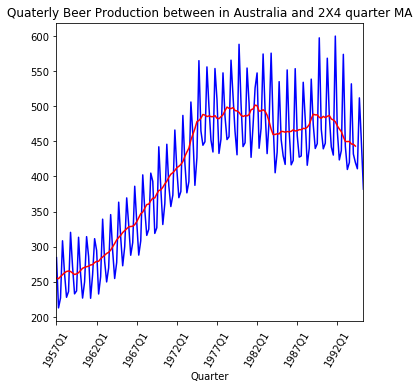

In [14]:
#Let's plot the original time series and the seasonal moving averages
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')
plt.savefig('plots/ch2/B07887_02_16.png', format='png', dpi=300)

In [15]:
#Let's compute the residuals after removing the trend
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

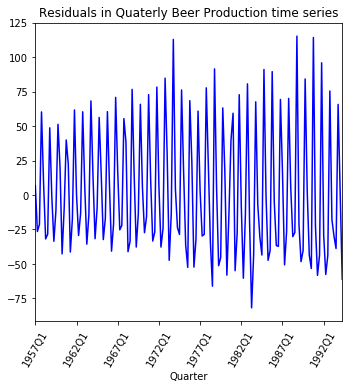

In [17]:
#Let's plot the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')
plt.savefig('plots/ch2/B07887_02_17.png', format='png', dpi=300)

In [12]:
from pandas.plotting import autocorrelation_plot

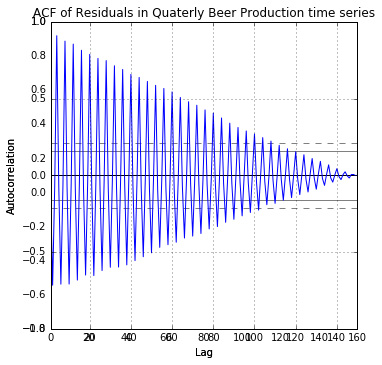

In [13]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')
plt.savefig('plots/ch2/B07887_02_18.png', format='png', dpi=300)
autocorrelation_plot(residuals)

In [14]:
#Let's compute quarterly differecing to remove quaterly seasonality
residuals_qtr_diff = residuals.diff(4)

In [15]:
#Remove null values
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

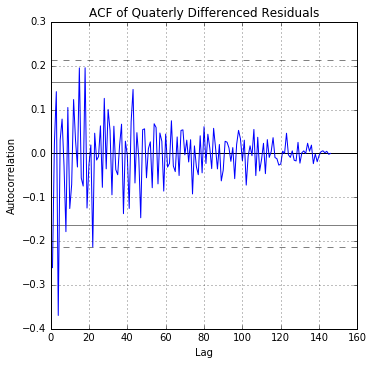

In [16]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')
plt.savefig('plots/ch2/B07887_02_19.png', format='png', dpi=300)

In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current directory and work relative to it
os.chdir('D:/Practical Time Series/')

In [14]:
#Load the dataset into a pandas.DataFrame
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.index = ibm_df['Date']

In [15]:
#Let's find out the shape of the DataFrame
print('Shape of the dataframe:', ibm_df.shape)

Shape of the dataframe: (1009, 2)


In [16]:
#Let's see the top 10 rows
ibm_df.head(10)

,Date,IBM common stock closing prices
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50
1962-01-09,1962-01-09,556.00
1962-01-10,1962-01-10,557.00
1962-01-11,1962-01-11,563.00
1962-01-12,1962-01-12,564.00


In [17]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Close_Price
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


In [18]:
#remove missing values
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


In [19]:
#To illustrate the idea of moving average we compute a weekly moving average taking
#a window of 5 days instead of 7 days because trading happens only during the weekdays.
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

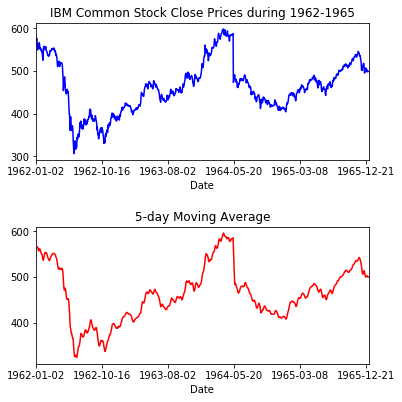

In [22]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('plots/ch2/B07887_02_14.png', format='png', dpi=300)

In [10]:
#Calculate the moving averages using 'rolling' and 'mean' functions
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [11]:
#Let's remove NaN from the above variables
MA2 = MA2.ix[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.ix[~pd.isnull(TwoXMA2)]

MA4 = MA4.ix[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.ix[~pd.isnull(TwoXMA4)]

MA3 = MA3.ix[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.ix[~pd.isnull(ThreeXMA3)]

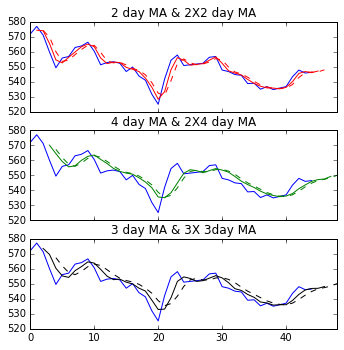

In [12]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')
plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)

## Chapter 2: Time Series Decomposition

In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('D:/Practical Time Series')

In [4]:
"""
This notebook illustrates time series decomposition by moving averages.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by moving averages.\nBoth additive and multiplicative models are demonstrated.\n'

In [5]:
"""
Let us demonstrate the addtive model using US Airlines monthly miles flown dataset.
"""

'\nLet us demonstrate the addtive model using US Airlines monthly miles flown dataset.\n'

In [14]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles['Month']

In [15]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [16]:
#Let's see first 10 rows of it
air_miles.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0
1963-06,1963-06,9644.0
1963-07,1963-07,10466.0
1963-08,1963-08,10748.0
1963-09,1963-09,9963.0


In [17]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [18]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


In [19]:
#Let us estimate the trend component by 2X12 monthly moving average
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

In [20]:
#Let us now compute the residuals after removing the trend component
residuals = air_miles['Air miles flown'] - trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [21]:
#After deducting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

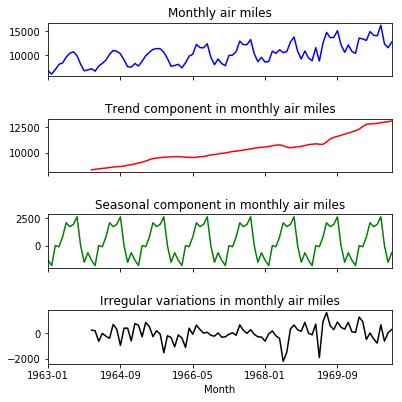

In [27]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

plt.savefig('plots/ch2/B07887_02_20.png', format='png', dpi=300)

In [29]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [30]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.0657741102573


In [31]:
"""
The additive decompostion has been able to reduce the p-value
from 0.99 in case of the original time series
(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.99 in case of the original time series\n(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)\nto 0.066 after decomposing.\n'

In [32]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [33]:
"""
Computation of the trend-cycle component remain same. But the seasonal component
is estimated as follows
"""

'\nComputation of the trend-cycle component remain same. But the seasonal component\nis estimated as follows\n'

In [34]:
#We start with the residuals left after removing the trend component
residuals = air_miles['Air miles flown'] / trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [35]:
#After adjusting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

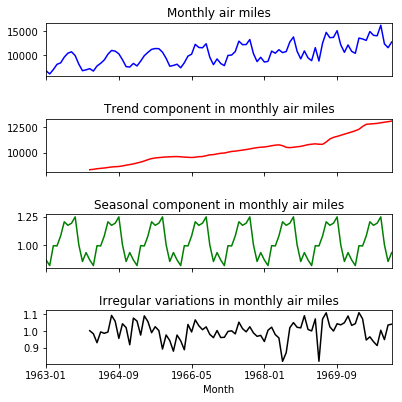

In [36]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

plt.savefig('plots/ch2/B07887_02_21.png', format='png', dpi=300)

In [38]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [39]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.000176452809084


In [40]:
"""
Voila! The p-val has further reduced to 0.000176.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced to 0.000176.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'

In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('D:/Practical Time Series')

In [5]:
"""
This notebook illustrates time series decomposition by the statsmodels package.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by the statsmodels package.\nBoth additive and multiplicative models are demonstrated.\n'

In [6]:
"""
Let us demonstrate the addtive model using Wisconsin Employment
Jan. 1961 – OCt. 1975 dataset.
"""

'\nLet us demonstrate the addtive model using Wisconsin Employment\nJan. 1961 – OCt. 1975 dataset.\n'

In [12]:
#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [13]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [14]:
#Let's see first 10 rows of it
wisc_emp.head(10)

,Month,Employment
Month,,
1961-01,1961-01,239.6
1961-02,1961-02,236.4
1961-03,1961-03,236.8
1961-04,1961-04,241.5
1961-05,1961-05,243.7
1961-06,1961-06,246.1
1961-07,1961-07,244.1
1961-08,1961-08,244.2
1961-09,1961-09,244.8


In [15]:
#Check for missing values and remove the row
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [16]:
#Run ADF test on the original time series
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')

In [17]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.981000018954


In [18]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='additive')

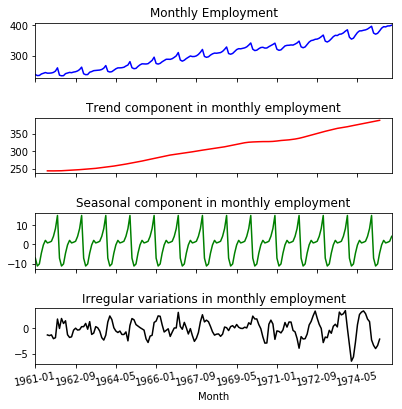

In [29]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)

In [13]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [14]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.00656093163464


In [15]:
"""
The additive decompostion has been able to reduce the p-value
from 0.98 in case of the original time series
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.98 in case of the original time series\nto 0.066 after decomposing.\n'

In [16]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [17]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='multiplicative')

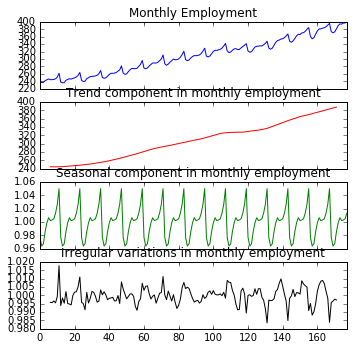

In [18]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

plt.savefig('plots/ch2/B07887_02_23.png', format='png', dpi=300)

In [19]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [20]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.00123478372677


In [21]:
"""
Voila! The p-val has further reduced 0.00123.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced 0.00123.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'